In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,260.579987,260.579987,252.529999,252.990005,250.567963,31422800
1,2022-06-13,245.110001,249.020004,241.529999,242.259995,239.940689,46135800
2,2022-06-14,243.860001,245.740005,241.509995,244.490005,242.149338,28651500
3,2022-06-15,248.309998,255.300003,246.419998,251.759995,249.349731,33111700
4,2022-06-16,245.979996,247.419998,243.020004,244.970001,242.624725,33169200
...,...,...,...,...,...,...,...
246,2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
247,2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200
248,2023-06-07,331.649994,334.489990,322.500000,323.380005,323.380005,40717100
249,2023-06-08,323.940002,326.640015,323.350006,325.260010,325.260010,23277700


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-06-10,252.990005
1,2022-06-13,242.259995
2,2022-06-14,244.490005
3,2022-06-15,251.759995
4,2022-06-16,244.970001
...,...,...
246,2023-06-05,335.940002
247,2023-06-06,333.679993
248,2023-06-07,323.380005
249,2023-06-08,325.260010


In [3]:
df['Date']

0      2022-06-10
1      2022-06-13
2      2022-06-14
3      2022-06-15
4      2022-06-16
          ...    
246    2023-06-05
247    2023-06-06
248    2023-06-07
249    2023-06-08
250    2023-06-09
Name: Date, Length: 251, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-06-10')
datetime_object

datetime.datetime(2022, 6, 10, 0, 0)

In [5]:
df

,Date,Close
0,2022-06-10,252.990005
1,2022-06-13,242.259995
2,2022-06-14,244.490005
3,2022-06-15,251.759995
4,2022-06-16,244.970001
...,...,...
246,2023-06-05,335.940002
247,2023-06-06,333.679993
248,2023-06-07,323.380005
249,2023-06-08,325.260010


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\conda_tmp;\ipykernel_5704\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-06-10
1     2022-06-13
2     2022-06-14
3     2022-06-15
4     2022-06-16
         ...    
246   2023-06-05
247   2023-06-06
248   2023-06-07
249   2023-06-08
250   2023-06-09
Name: Date, Length: 251, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2022-06-10,252.990005
2022-06-13,242.259995
2022-06-14,244.490005
2022-06-15,251.759995
2022-06-16,244.970001
...,...
2023-06-05,335.940002
2023-06-06,333.679993
2023-06-07,323.380005


In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
windowed_df = df_to_windowed_df(df, 
                                '2022-06-15', 
                                '2023-06-09', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-06-15,252.990005,242.259995,244.490005,251.759995
1,2022-06-16,242.259995,244.490005,251.759995,244.970001
2,2022-06-17,244.490005,251.759995,244.970001,247.649994
3,2022-06-21,251.759995,244.970001,247.649994,253.740005
4,2022-06-22,244.970001,247.649994,253.740005,253.130005
...,...,...,...,...,...
243,2023-06-05,328.390015,332.579987,335.399994,335.940002
244,2023-06-06,332.579987,335.399994,335.940002,333.679993
245,2023-06-07,335.399994,335.940002,333.679993,323.380005
246,2023-06-08,335.940002,333.679993,323.380005,325.260010


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

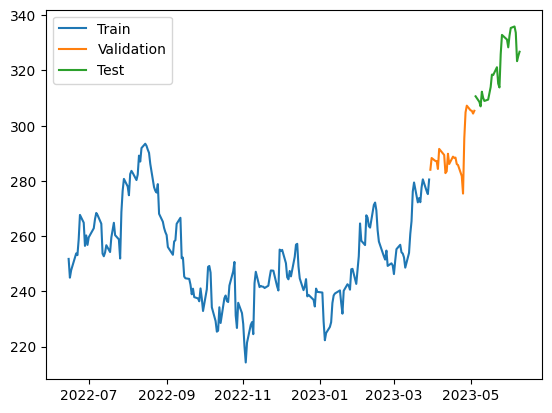

In [12]:
import matplotlib.pyplot as plt
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 93ms/step - loss: 63918.2578 - mean_absolute_error: 252.2651 - val_loss: 84136.6094 - val_mean_absolute_error: 289.9280
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 63487.7539 - mean_absolute_error: 251.4087 - val_loss: 83577.0234 - val_mean_absolute_error: 288.9613
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 62929.8086 - mean_absolute_error: 250.2985 - val_loss: 82815.7891 - val_mean_absolute_error: 287.6411
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 62242.7109 - mean_absolute_error: 248.9189 - val_loss: 81952.0391 - val_mean_absolute_error: 286.1358
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 61469.0977 - mean_absolute_error: 247.3641 - val_loss: 81016.2812 - val_mean_absolute_error: 284.4958
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 60561.1250 - mean_absolute_error: 245.5202 - val_loss: 797

7/7 [==============================] - 0s 18ms/step - loss: 280.7917 - mean_absolute_error: 13.4905 - val_loss: 1575.4828 - val_mean_absolute_error: 38.6929
Epoch 49/100
7/7 [==============================] - 0s 18ms/step - loss: 280.7800 - mean_absolute_error: 13.4862 - val_loss: 1575.2056 - val_mean_absolute_error: 38.6894
Epoch 50/100
7/7 [==============================] - 0s 18ms/step - loss: 280.7986 - mean_absolute_error: 13.4878 - val_loss: 1569.5685 - val_mean_absolute_error: 38.6164
Epoch 51/100
7/7 [==============================] - 0s 18ms/step - loss: 280.9499 - mean_absolute_error: 13.5001 - val_loss: 1532.8643 - val_mean_absolute_error: 38.1382
Epoch 52/100
7/7 [==============================] - 0s 20ms/step - loss: 280.7708 - mean_absolute_error: 13.5250 - val_loss: 1538.5200 - val_mean_absolute_error: 38.2123
Epoch 53/100
7/7 [==============================] - 0s 18ms/step - loss: 280.7466 - mean_absolute_error: 13.5291 - val_loss: 1528.8728 - val_mean_absolute_error: 3

7/7 [==============================] - 0s 17ms/step - loss: 133.6582 - mean_absolute_error: 9.2649 - val_loss: 774.3574 - val_mean_absolute_error: 26.7912
Epoch 97/100
7/7 [==============================] - 0s 17ms/step - loss: 128.0443 - mean_absolute_error: 9.0160 - val_loss: 698.8517 - val_mean_absolute_error: 25.3270
Epoch 98/100
7/7 [==============================] - 0s 17ms/step - loss: 125.6877 - mean_absolute_error: 8.9228 - val_loss: 645.4783 - val_mean_absolute_error: 24.2483
Epoch 99/100
7/7 [==============================] - 0s 18ms/step - loss: 126.9657 - mean_absolute_error: 9.0201 - val_loss: 608.4045 - val_mean_absolute_error: 23.4821
Epoch 100/100
7/7 [==============================] - 0s 18ms/step - loss: 128.2763 - mean_absolute_error: 9.2244 - val_loss: 816.7108 - val_mean_absolute_error: 27.6651


7/7 [==============================] - 0s 7ms/step


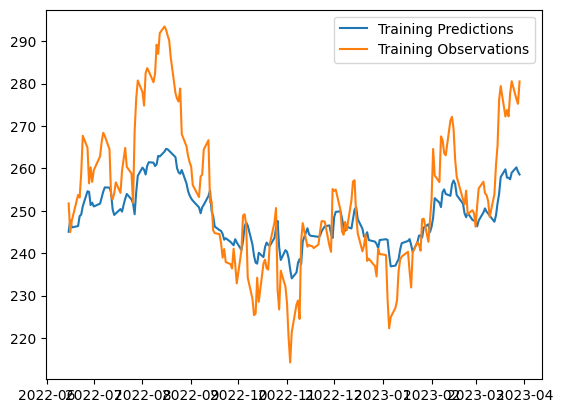

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 32ms/step


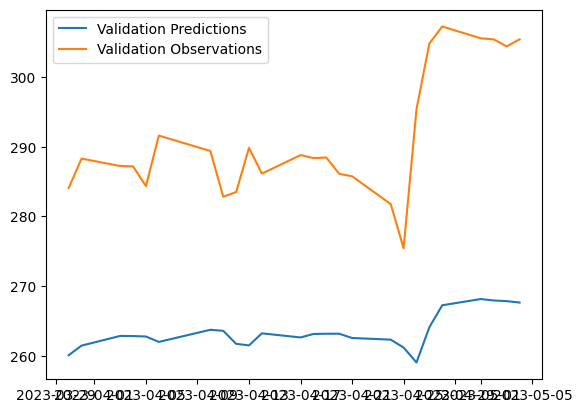

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


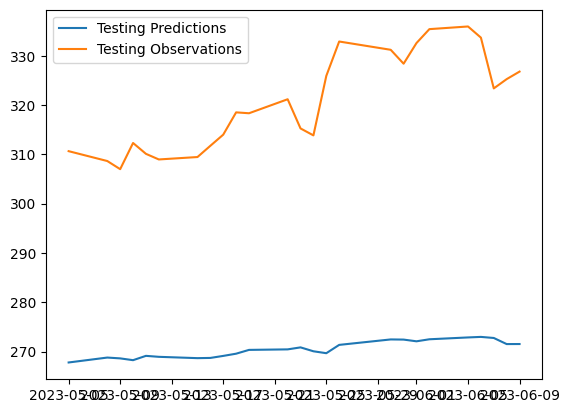

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])